In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [23]:
df=pd.read_csv("training_data_student_perf.csv")
df_test=pd.read_csv("test_data_student_perf.csv")
df["Extracurricular Activities"]=(df["Extracurricular Activities"]=="Yes").astype(int)
df_test["Extracurricular Activities"]=(df["Extracurricular Activities"]=="Yes").astype(int)

df.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,1,54,1,8,5,28.0
1,1,87,1,7,5,64.0
2,3,84,0,6,6,61.0
3,1,92,1,4,6,67.0
4,4,81,1,7,0,65.0


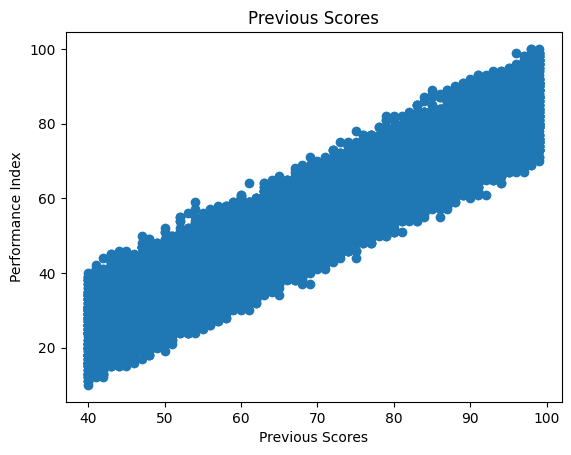

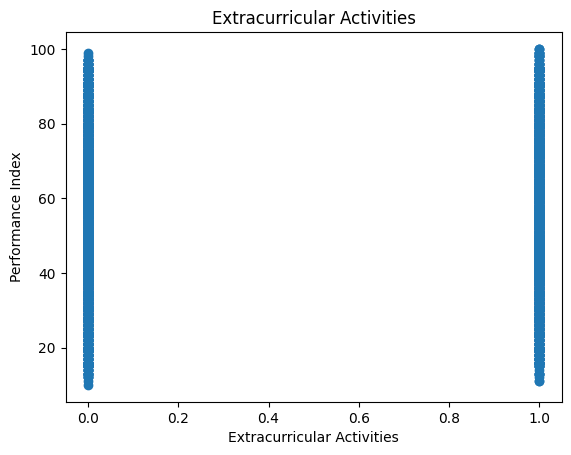

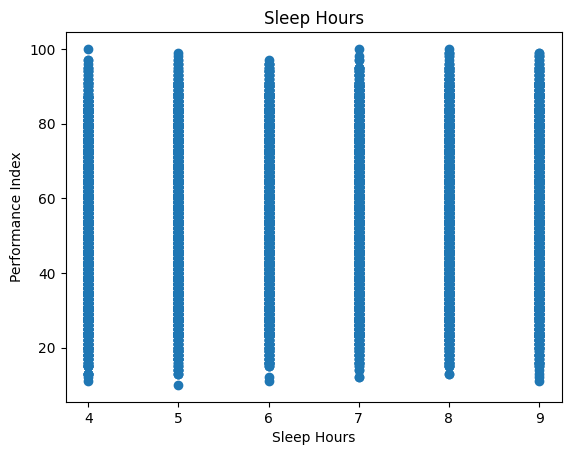

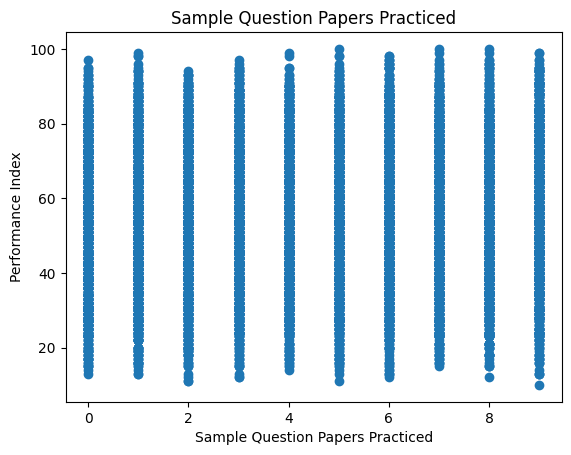

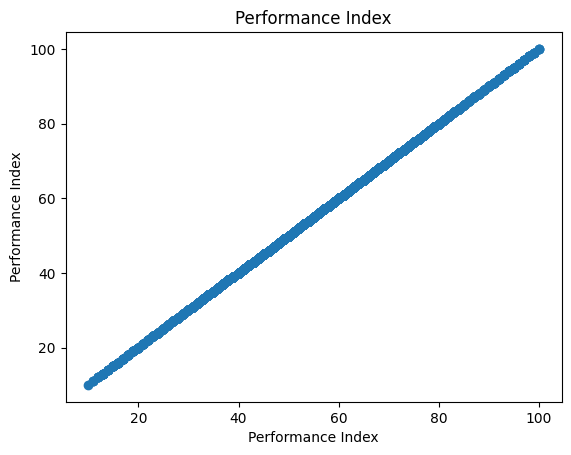

In [24]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["Performance Index"])
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel("Performance Index")
  plt.show()

In [35]:
y=df["Performance Index"]
X=df.drop("Performance Index",axis=1)
X_train,X_val,y_train,y_val= train_test_split(X,y,test_size=0.2,random_state=42)


In [29]:
mod=LinearRegression()
mod.fit(X_train,y_train)

mod.score(X_val,y_val)

0.9885796314994506

In [36]:
csv=mod.predict(df_test.drop("ID",axis=1))


In [38]:
ans=pd.DataFrame(csv)
ans.to_csv("prediction.csv",index=False)

In [41]:
from sklearn.ensemble import RandomForestRegressor
mod2=RandomForestRegressor()
mod2.fit(X_train,y_train)

mod2.score(X_val,y_val)

0.9851127690522485

In [42]:
from sklearn.tree import DecisionTreeRegressor
mod3=DecisionTreeRegressor(random_state=0)
mod3.fit(X_train,y_train)

mod3.score(X_val,y_val)

0.9746241336542147